# Volume 4: Introduction to Initial and Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib
matplotlib.use('nbAgg') #change backend
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

<IPython.core.display.Javascript object>


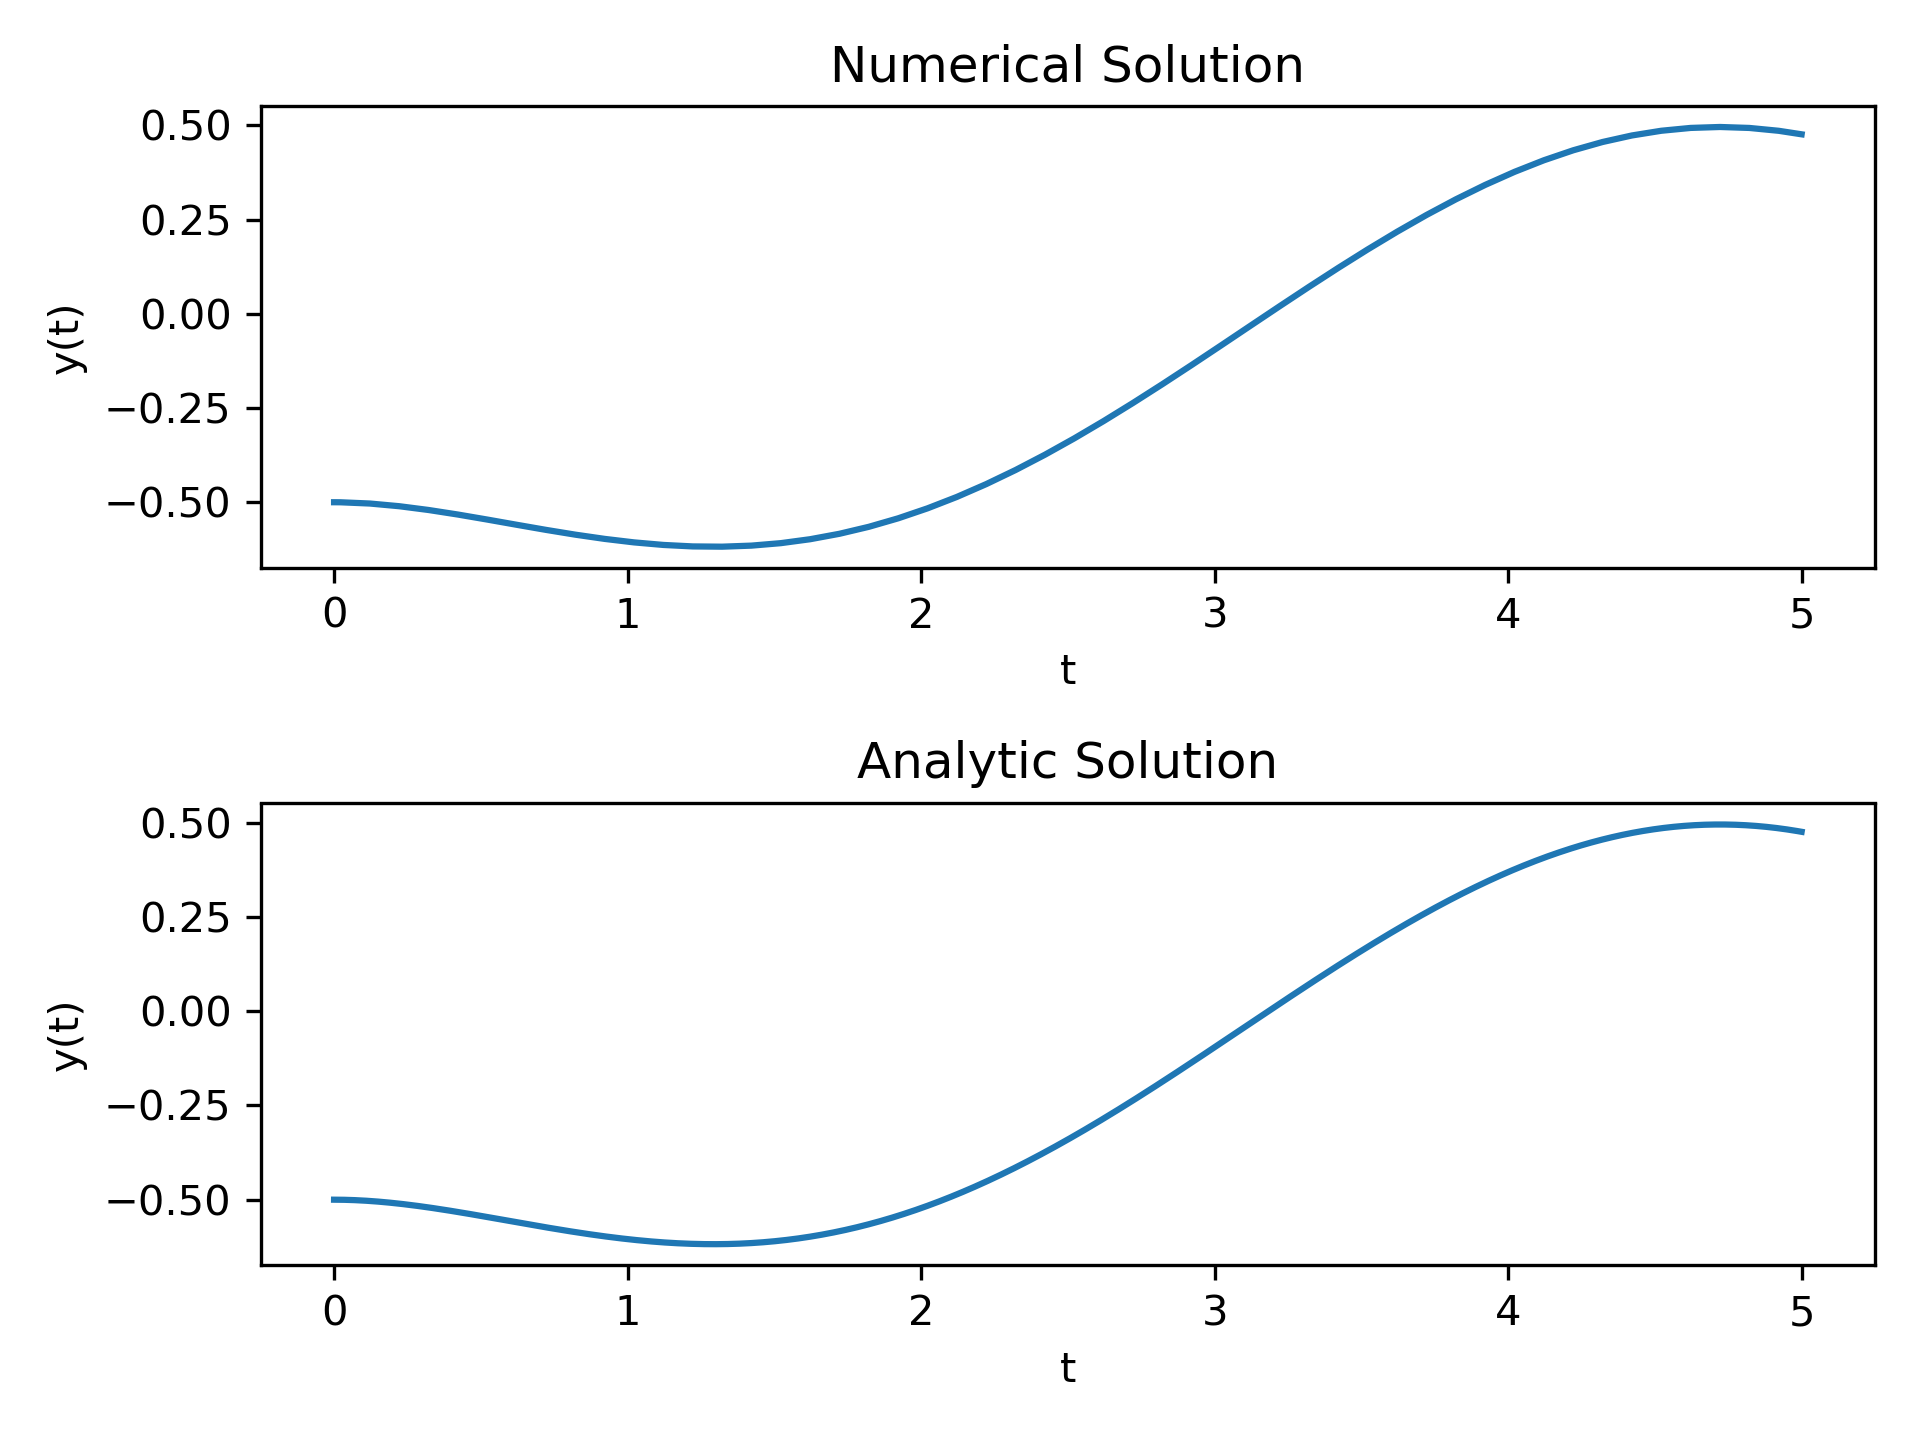

In [2]:
a,b = 0,5
ode = lambda t,y: np.array([y[1],np.sin(t)+y[0]])
y0 = np.array([-1/2,0]) #initial guess
t_span = (a,b) #interval of interest
sol = solve_ivp(ode,t_span,y0,max_step=0.1) #scipy solve_ivp object
analytic = lambda t: (-1/2)*(np.exp(-t)+np.sin(t))
t_eval = np.linspace(a,b,1000)
analytic_eval = analytic(t_eval)

#declare subplots
plt.subplot(211).plot(sol.t,sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Numerical Solution")
plt.subplot(212).plot(t_eval,analytic_eval)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Analytic Solution")
plt.tight_layout()
plt.show()

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

<IPython.core.display.Javascript object>


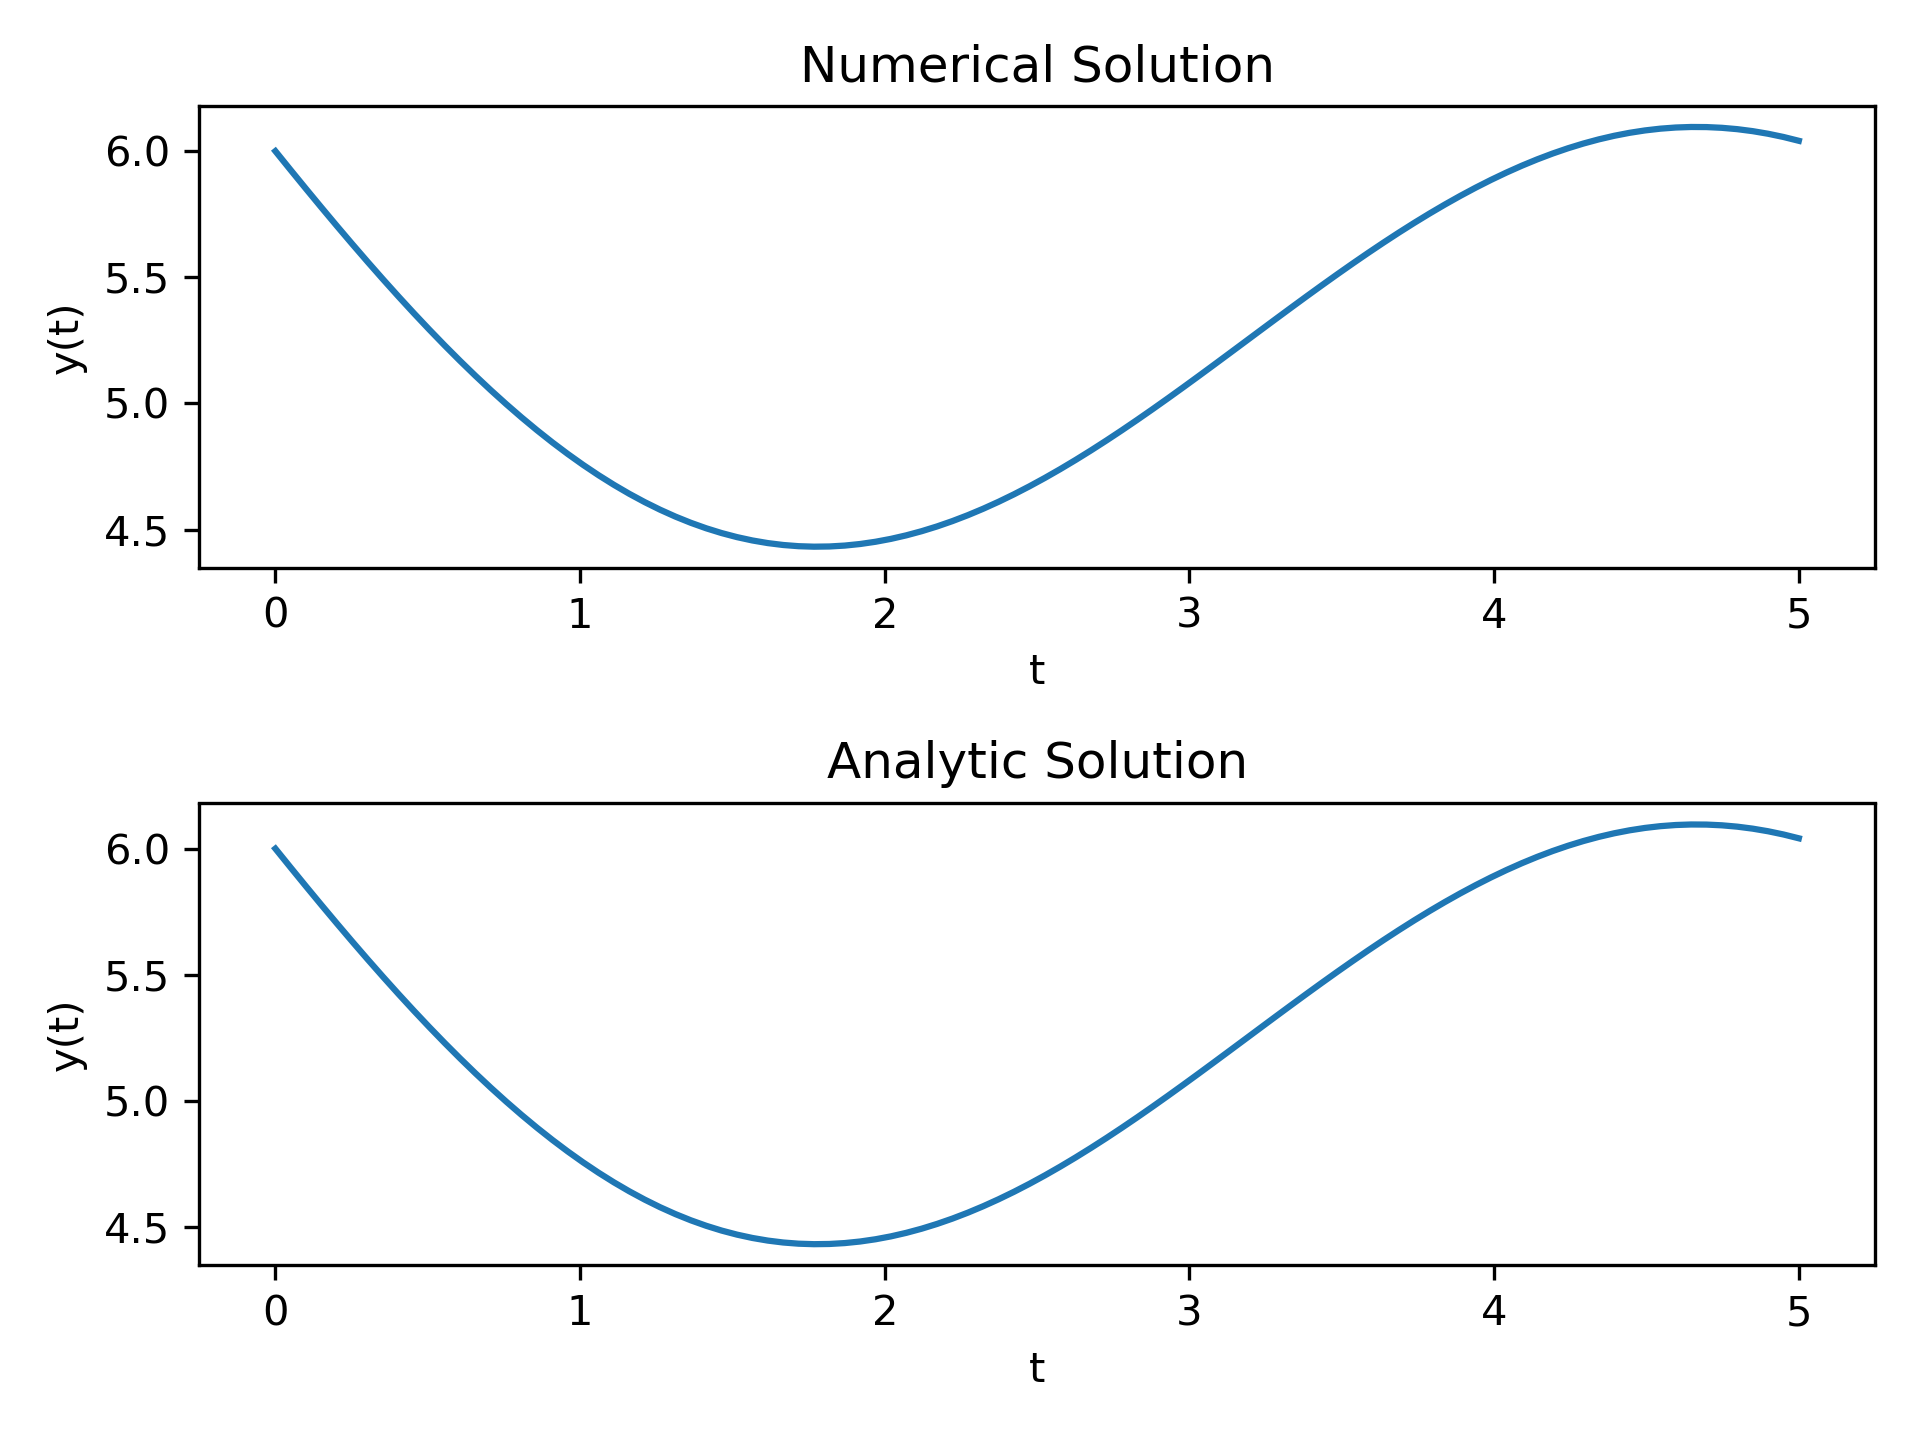

In [3]:
a,b = 0,5
ode = lambda t,y: np.array([y[1],(-1/4)*np.exp(-(1/2)*t)+np.sin(t)-np.cos(t)-y[1]])
x,y = 6,-0.324705
bc = lambda ya,yb: np.array([ya[0] - x, yb[1] - y]) #boundary conditions
t_steps = 100
t = np.linspace(a,b,t_steps)
y0 = np.ones((2,t_steps)) #initial guess array of ones
analytic = lambda t: np.exp(-0.5*t) - np.sin(t) + 5
sol = solve_bvp(ode,bc,t,y0) #scipy boundary vp solver object

plt.subplot(211).plot(sol.x,sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Numerical Solution")
plt.subplot(212).plot(t,analytic(t))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Analytic Solution")
plt.tight_layout()
plt.show()

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

<IPython.core.display.Javascript object>


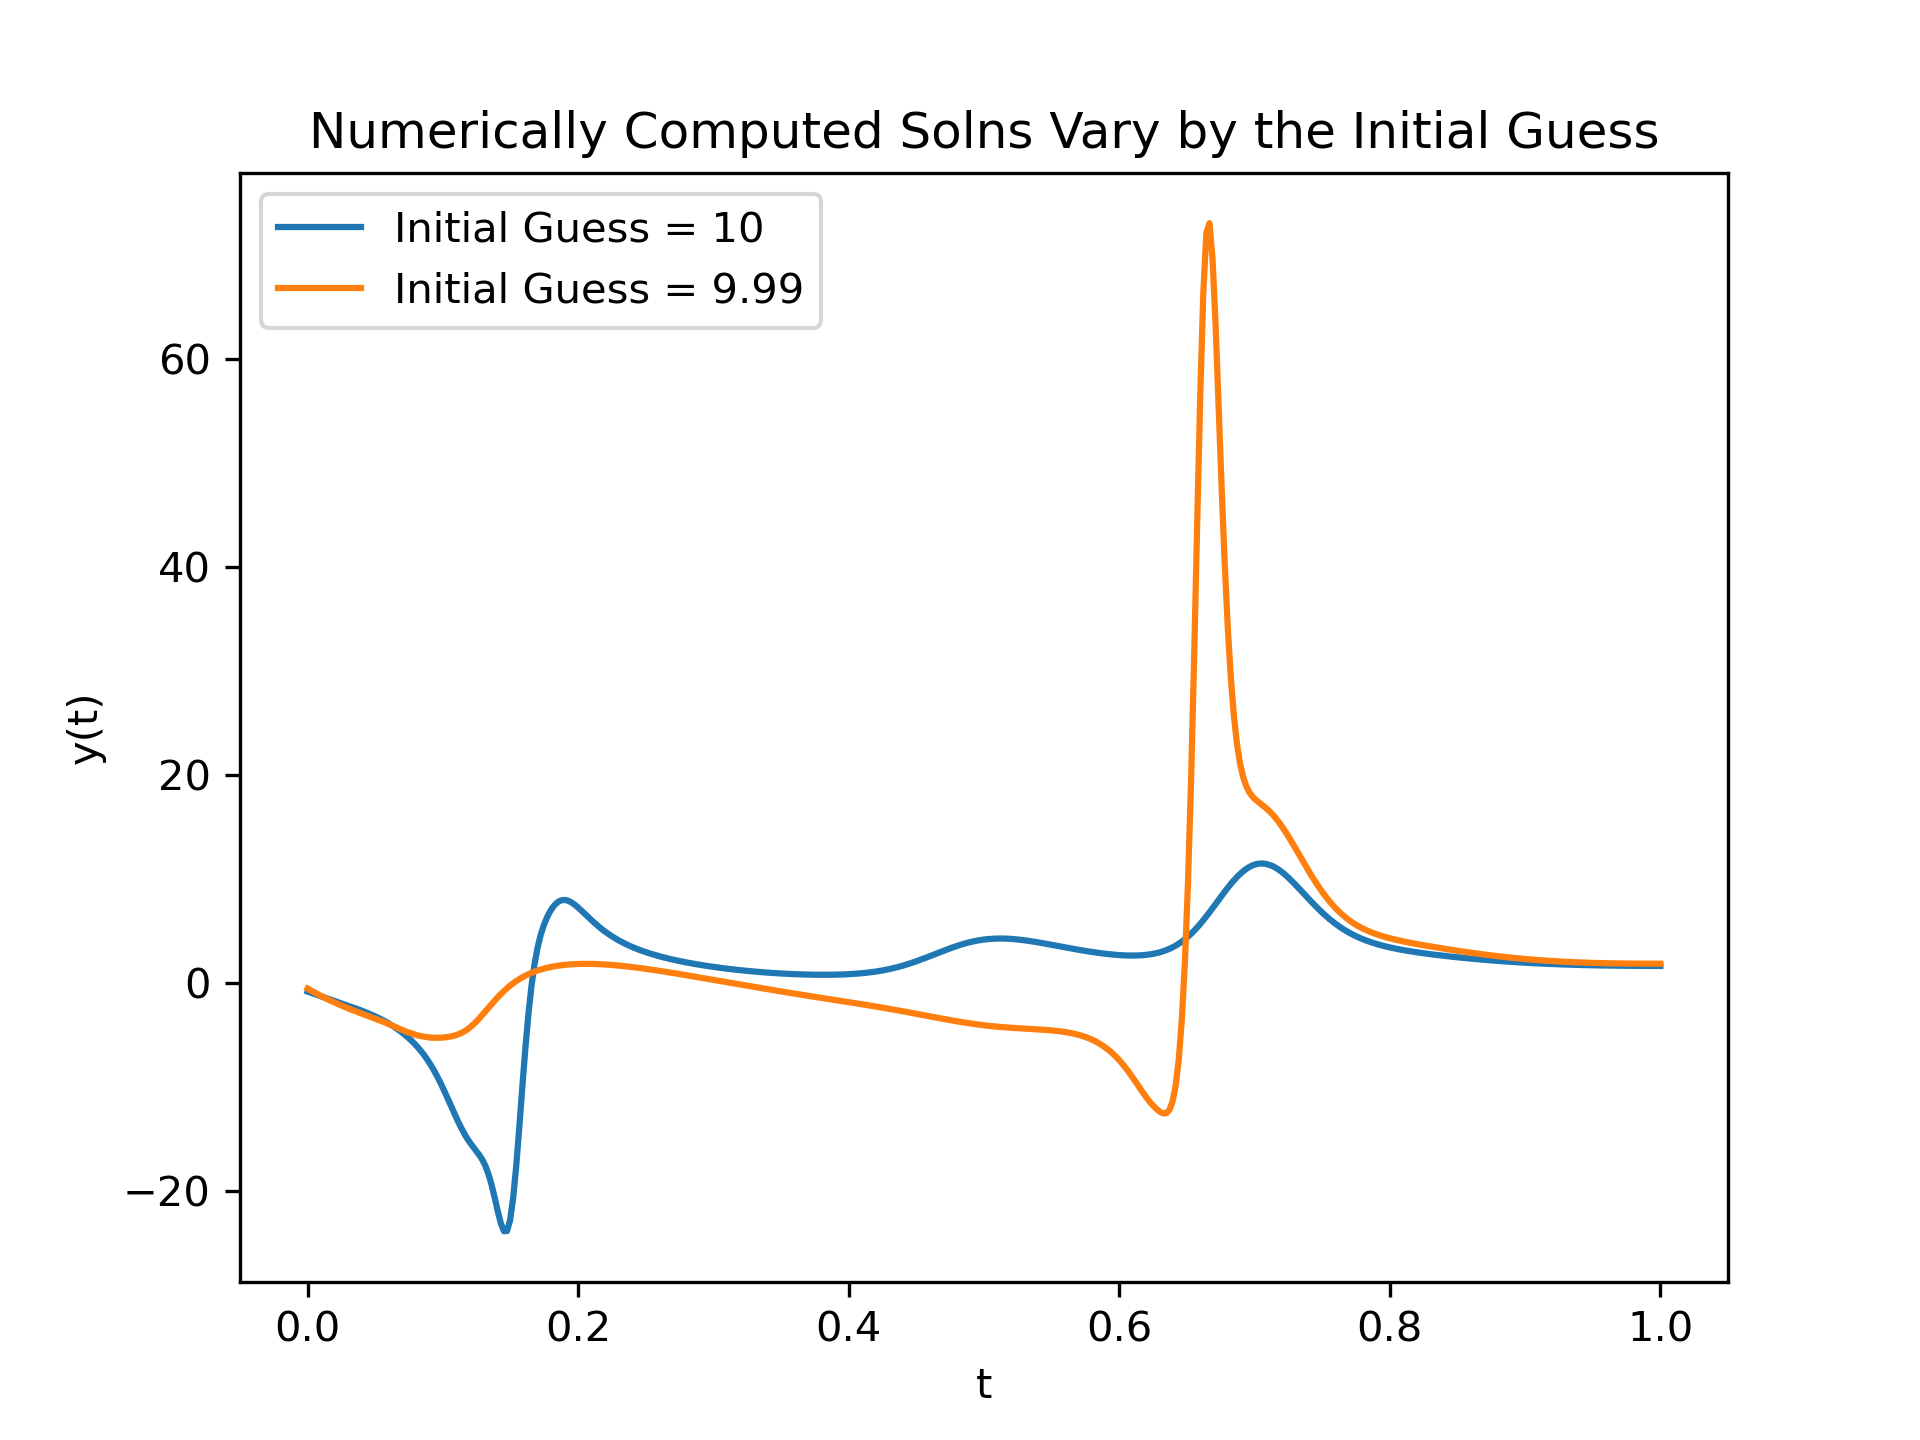

In [4]:
a,b = 0,1
ode = lambda t,y: np.array([y[1],10*y[0]-10*y[0]*y[1]])
x,y = -1, 3/2
bc = lambda ya,yb: np.array([ya[0] - x, yb[0] - y])
t_steps = 50
t = np.linspace(a,b,t_steps)
y0 = np.ones((2,t_steps))*10
sol_a = solve_bvp(ode,bc,t,y0) #with guess of 10
y0 = np.ones((2,t_steps))*9.99
sol_b = solve_bvp(ode,bc,t,y0) #with guess of 9.99

plt.plot(sol_a.x,sol_a.y[0],label="Initial Guess = 10")
plt.plot(sol_b.x,sol_b.y[0],label="Initial Guess = 9.99")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title('Numerically Computed Solns Vary by the Initial Guess')
plt.show()

### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

<IPython.core.display.Javascript object>


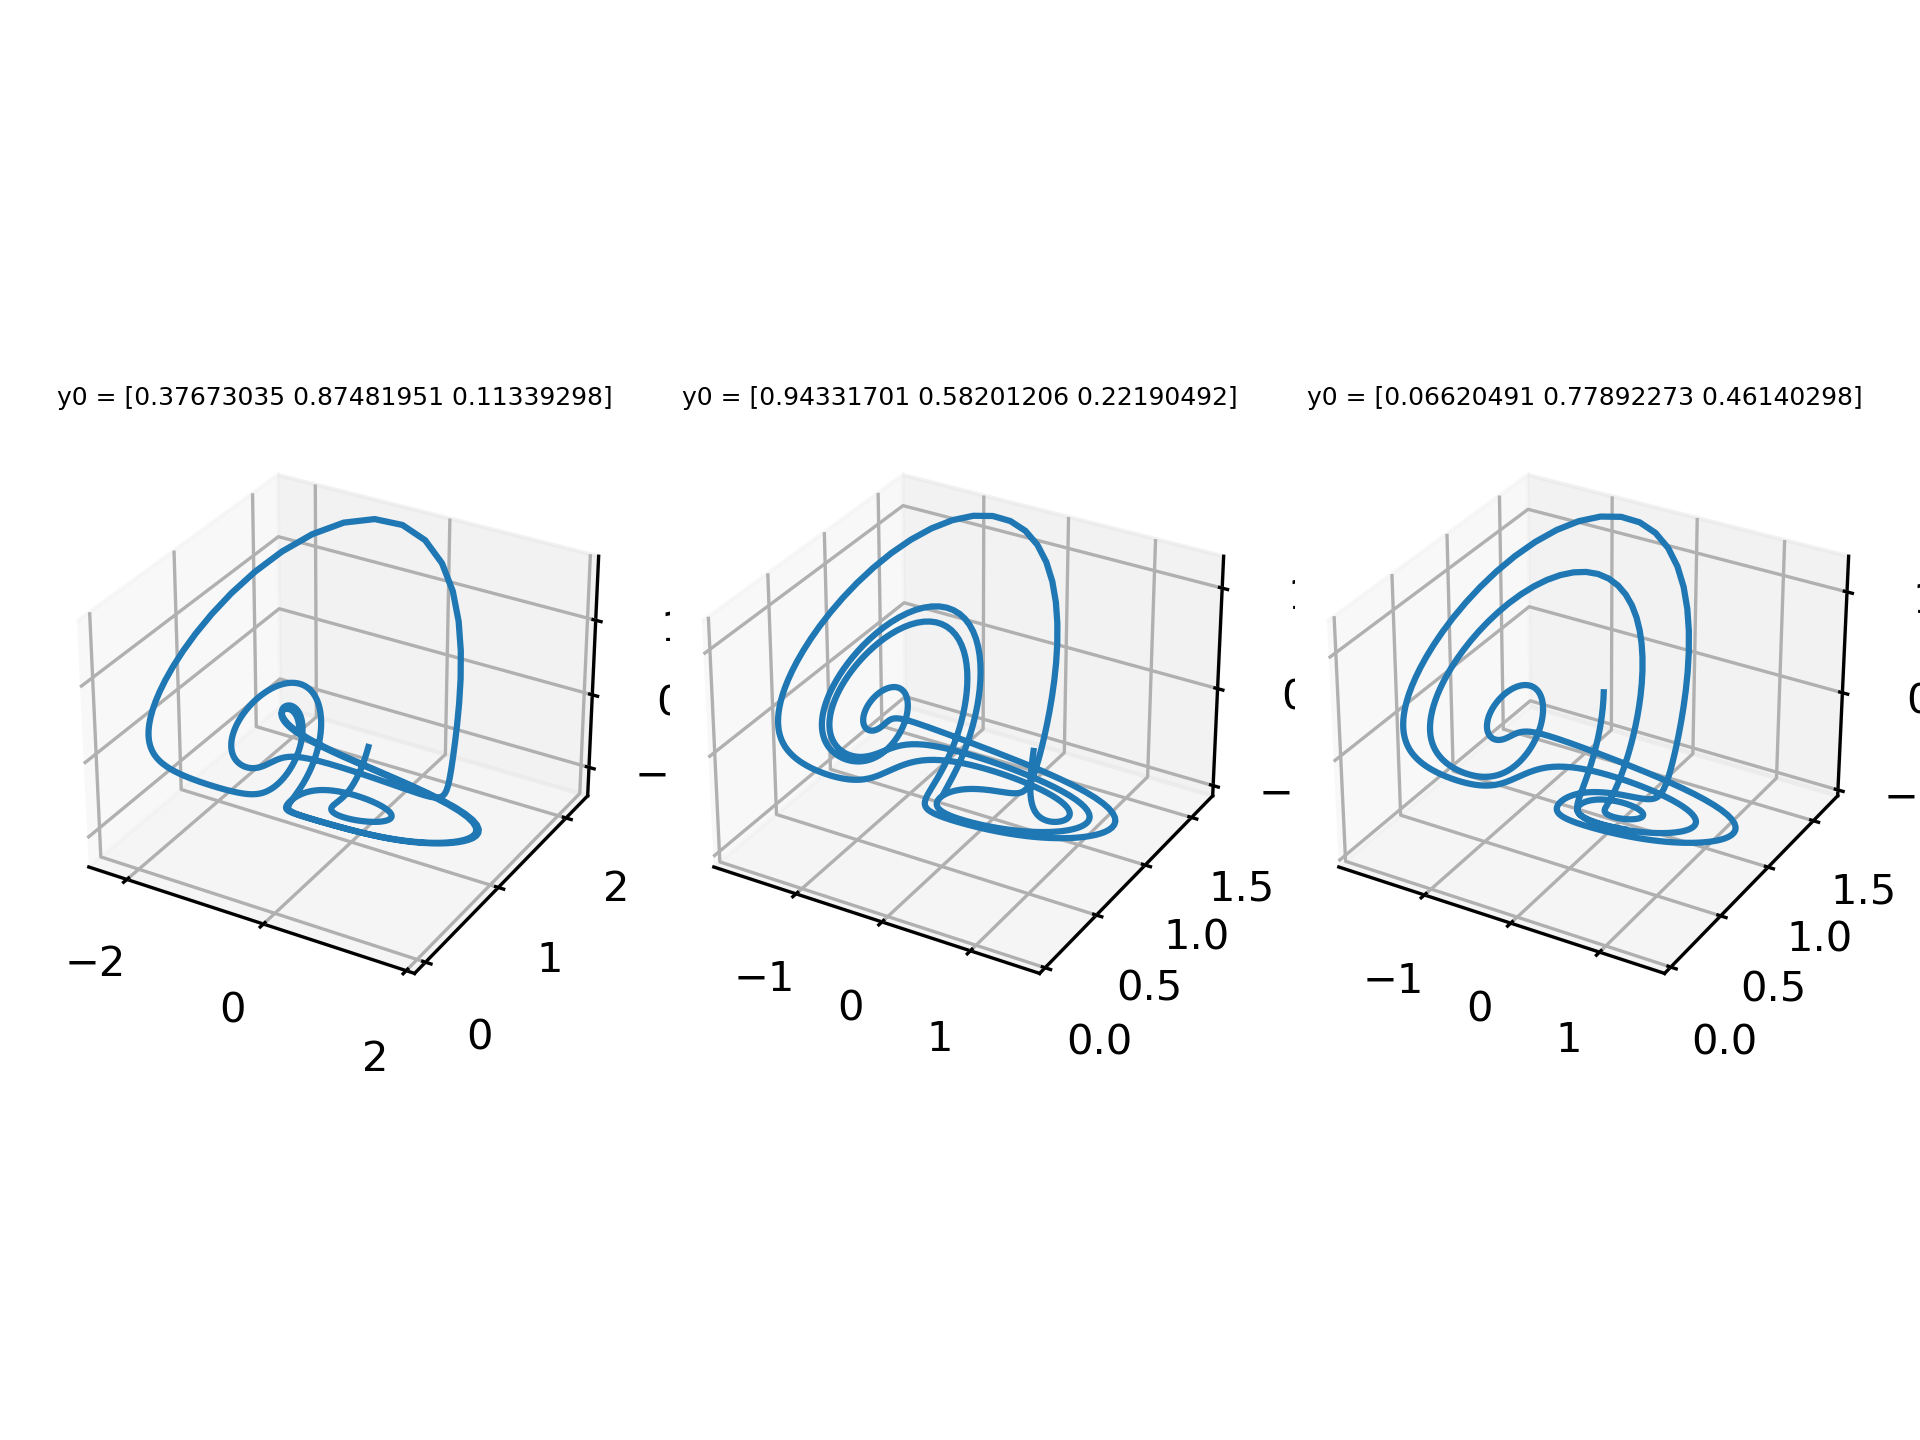

In [5]:
a,b,c = 0.2,0.01,-0.4
ode = lambda t,y: np.array([a*y[0] + y[1]*y[2],b*y[0]+c*y[1]+-y[0]*y[2],-y[2]-y[0]*y[1]])
t_span = (0,100)
y0_guesses = [np.random.random(3) for i in range(3)] #random initial guesses

for i,y0 in enumerate(y0_guesses):
    sol = solve_ivp(ode,t_span,y0,max_step=0.1)
    plt.subplot(1,3,i+1,projection='3d').plot(sol.y[0],sol.y[1],sol.y[2]) #'3d' makes the plot 3d
    plt.title(f"y0 = {y0}",fontsize=6)
plt.tight_layout()
plt.show()

## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

<IPython.core.display.Javascript object>


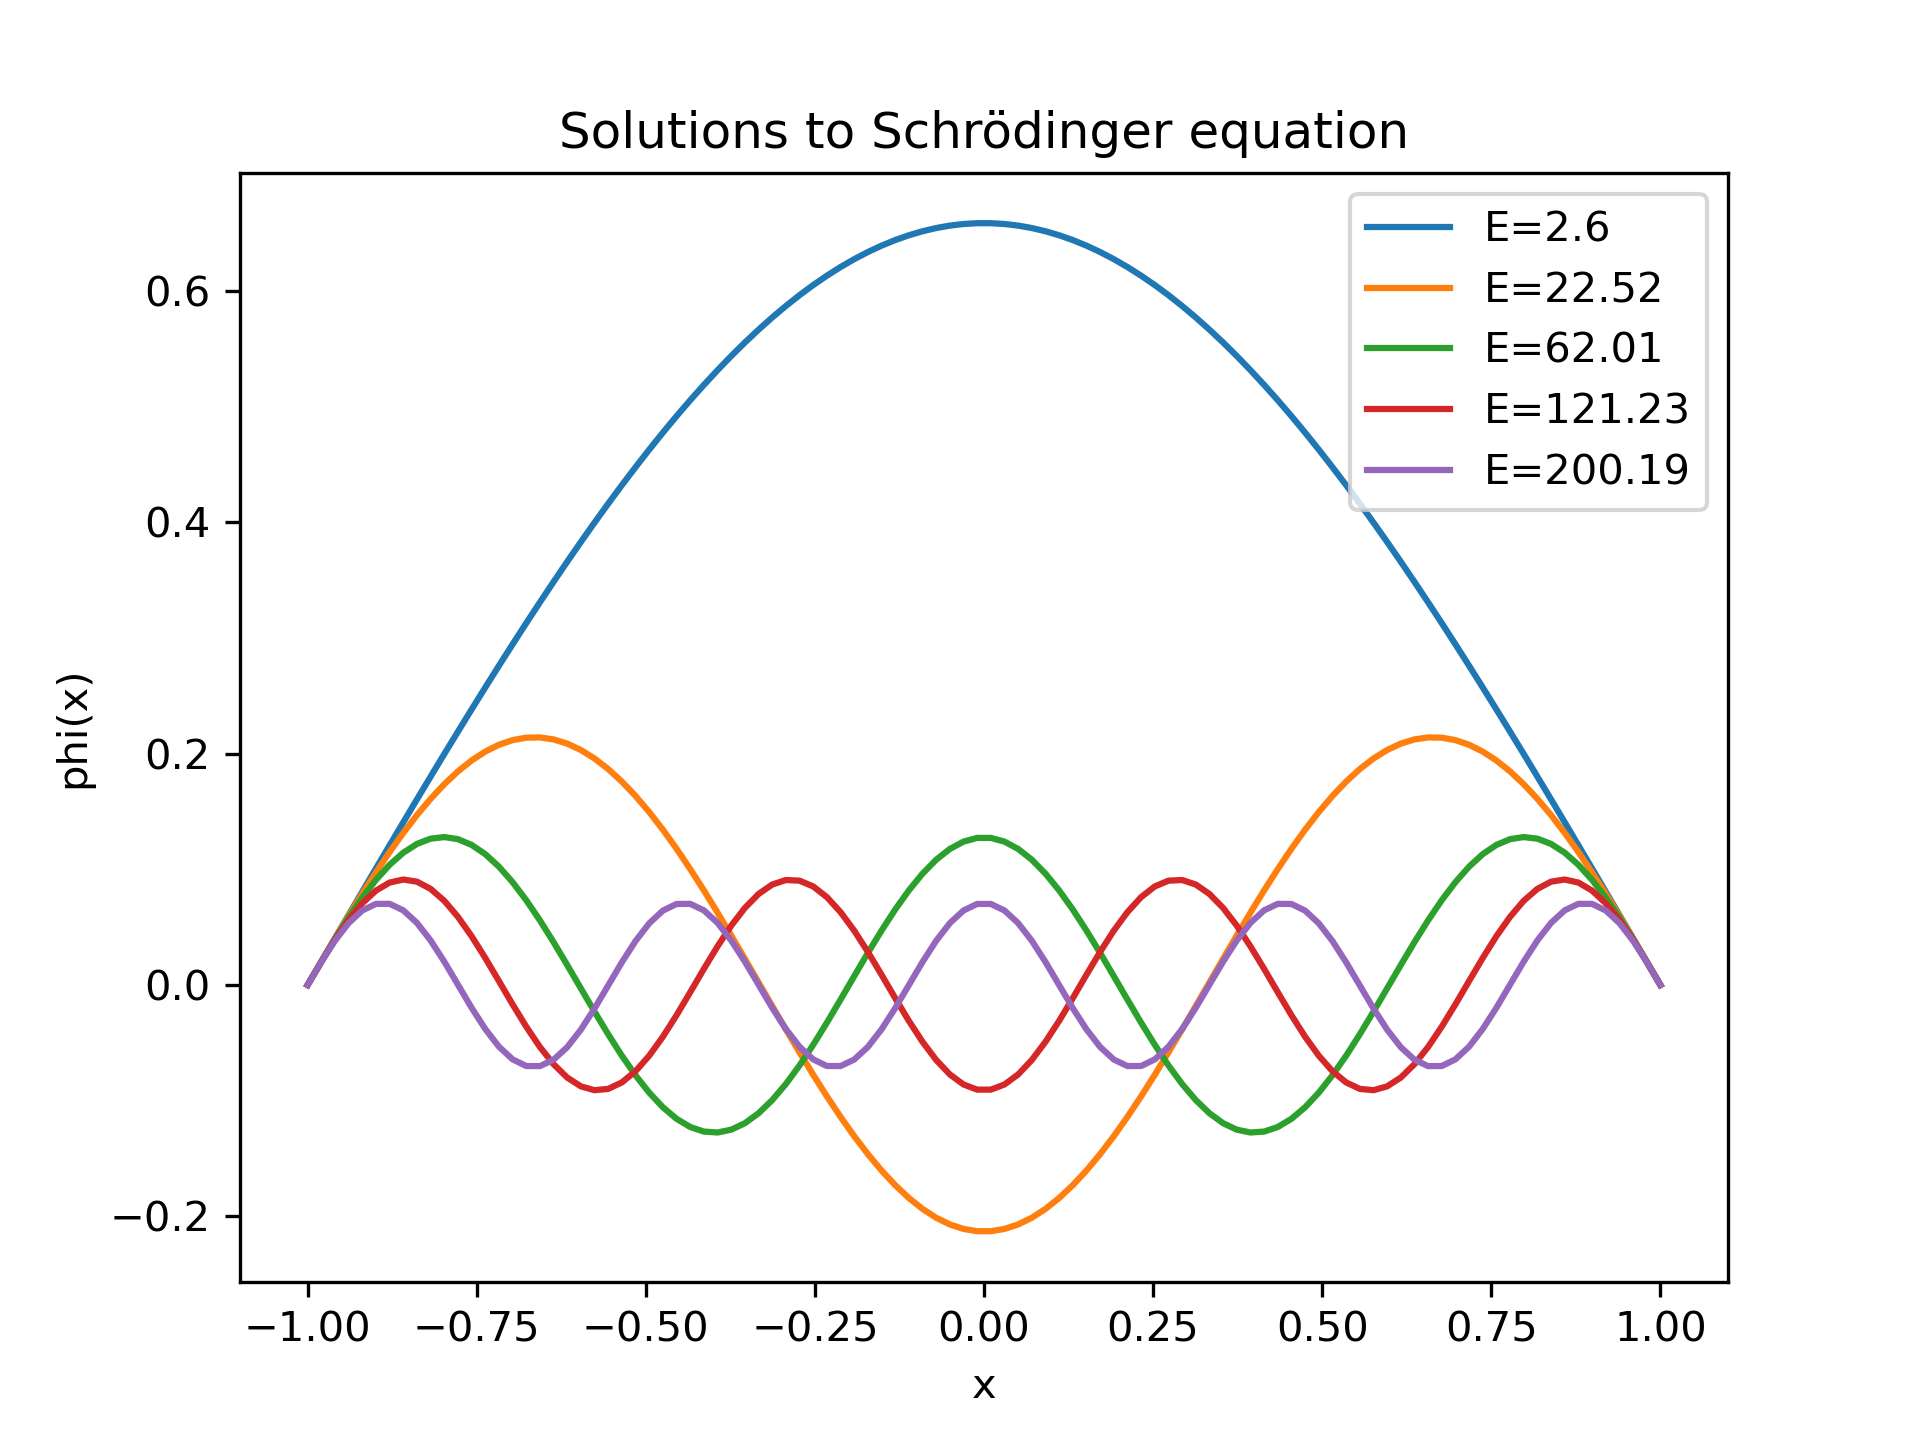

In [6]:
a,b = -1,1
ode = lambda x,y,E: np.array([y[1],(x**2)*y[0] - E*y[0]])
x,y=0,1
bcs = lambda ya,yb,E: np.array([ya[0] - x,ya[1] - y,yb[0] - x])
#we include a boundary condition for the free paramter
t_step = 100 #number of time steps for the interval
t = np.linspace(a,b,t_step)
y_guess = np.ones((2,t_step))
for e in [2.60,22.52,62.01,121.23,200.19]: #all the guesses for E
    sol = solve_bvp(ode,bcs,t,y_guess,p=[e])
    plt.plot(sol.x,sol.y[0],label=f'E={e}')
    plt.xlabel('x')
    plt.ylabel('phi(x)')
    plt.legend()
plt.title('Solutions to Schrödinger equation')
plt.show()